In [1]:
import os
import re
import sys
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, WeightedRandomSampler
from pykospacing import spacing
from sklearn.model_selection import StratifiedShuffleSplit
from transformers import BertTokenizer
from konlpy.tag import Mecab
# from googletrans import LANGUAGES, Translator

sys.path.insert(0, '../')
from dataset import REDataset, COLUMNS, load_data, LabelEncoder, LabelEncoder41
from tokenization import load_tokenizer
from models import load_model
from tokenization import SpecialToken as ST
from config import PreTrainedType, Config, ModelType, PreProcessType
from utils import save_pickle, load_pickle

In [48]:
data = pd.read_csv('../preprocessed/train_augmented.csv')

In [49]:
enc = LabelEncoder()

In [51]:
data['label'] = data['label'].apply(lambda x: enc.transform(x))

In [53]:
data.to_csv('../preprocessed/train_augmented.csv', index=False)

In [13]:
data['label_binary'] = data['label']
data['label_binary'] = data['label_binary'].map({'관계_없음': 0}).fillna(1).astype(int)

In [15]:
data_binary = data.drop('label', axis=1)

In [18]:
data_binary.rename({'label_binary': 'label'}, axis=1).to_csv("train_binary.csv", index=False)

In [36]:
data41 = data[data['label'] != "관계_없음"].reset_index(drop=True)

In [37]:
enc = LabelEncoder41()

In [38]:
data41 = data41.drop('label_binary', axis=1)

In [40]:
data41['label'] = data41['label'].apply(lambda x: enc.transform(x))

In [42]:
data41.to_csv("train41.csv", index=False)

In [44]:
data

,id,relation_state,e1,e1_start,e1_end,e2,e2_start,e2_end,label,label_binary
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작,1
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음,0
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭,1
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함,1
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님,1
...,...,...,...,...,...,...,...,...,...,...
8995,wikipedia-5414-12-15-21-0-4,2002년 FIFA 월드컵 사우디아라비아와의 1차전에서 독일은 8-0으로 승리하였는...,사우디아라비아,15,21,2002년,0,4,관계_없음,0
8996,wikipedia-10384-4-12-14-0-1,일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...,토요타,12,14,일본,0,1,단체:본사_국가,1
8997,wikipedia-25913-6-8-10-93-106,방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...,방덕룡,8,10,선무원종공신(宣武原從功臣),93,106,인물:직업/직함,1
8998,wikitree-12062-15-0-3-46-47,LG전자는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시리즈를 이달부터 ...,LG전자,0,3,북미,46,47,관계_없음,0


In [85]:
aug = pd.read_csv(Config.TrainP)
aug['label'] = aug['label'].apply(lambda x: enc.transform(x))

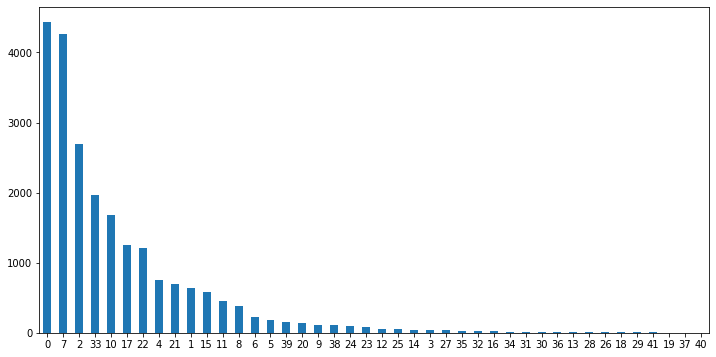

In [86]:
plt.figure(figsize=(12, 6))
aug['label'].value_counts().plot(kind='bar', rot=0)
plt.show()

In [69]:
data['label'].value_counts()

0     4432
10     815
4      683
2      553
15     335
6      231
7      209
5      186
17     171
8      164
20     135
9      115
24     103
1       92
21      84
23      79
33      67
11      58
22      56
25      52
14      45
12      45
3       44
27      36
35      27
32      26
16      23
38      18
34      15
31      15
30      12
13      11
36      11
39       9
28       9
26       8
18       7
29       6
41       5
19       4
37       3
40       1
Name: label, dtype: int64

In [56]:
valid_size = 0.15
st_split = StratifiedShuffleSplit(n_splits=2, test_size=valid_size)

In [61]:
for train_index, test_index in st_split.split(X, y):
    pass

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [43]:
dataset = REDataset(device='cpu')

Getting dataset for KoELECTRAv3...
Load raw data...	preprocessing for 'EntityMarker'...	done!
Load Tokenizer for EntityMarker...	done!
Update token_type_ids: 9000it [00:00, 31020.38it/s]


In [50]:
dataset.labels

[17,
 0,
 6,
 2,
 8,
 0,
 17,
 3,
 10,
 0,
 4,
 0,
 16,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 7,
 17,
 2,
 6,
 0,
 10,
 0,
 10,
 17,
 8,
 0,
 15,
 15,
 5,
 25,
 0,
 0,
 5,
 0,
 0,
 8,
 0,
 6,
 0,
 15,
 0,
 0,
 0,
 4,
 10,
 4,
 0,
 10,
 0,
 10,
 15,
 0,
 0,
 0,
 4,
 0,
 10,
 0,
 0,
 0,
 17,
 0,
 4,
 2,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 39,
 0,
 0,
 0,
 0,
 2,
 7,
 19,
 0,
 0,
 0,
 10,
 10,
 0,
 0,
 0,
 34,
 10,
 0,
 5,
 2,
 6,
 10,
 0,
 0,
 2,
 0,
 0,
 0,
 4,
 4,
 13,
 4,
 4,
 0,
 0,
 4,
 35,
 10,
 4,
 4,
 30,
 0,
 0,
 0,
 11,
 4,
 0,
 2,
 4,
 6,
 0,
 0,
 15,
 0,
 15,
 4,
 5,
 10,
 10,
 2,
 0,
 0,
 0,
 7,
 0,
 5,
 4,
 15,
 0,
 0,
 0,
 2,
 6,
 0,
 9,
 10,
 15,
 0,
 9,
 0,
 0,
 27,
 15,
 0,
 0,
 0,
 0,
 8,
 25,
 1,
 0,
 0,
 0,
 4,
 4,
 6,
 7,
 0,
 5,
 0,
 15,
 0,
 10,
 2,
 0,
 0,
 2,
 0,
 3,
 4,
 15,
 4,
 0,
 7,
 0,
 0,
 17,
 0,
 10,
 4,
 0,
 0,
 10,
 0,
 27,
 0,
 4,
 0,
 0,
 10,
 0,
 5,
 15,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 4,
 25,
 0,
 20,
 6,
 0,
 24,
 15,
 15,
 10,


In [44]:
weight = load_pickle('../preprocessed/sampling_weights.pkl')

In [45]:
sampler = WeightedRandomSampler(weights=weight, num_samples=len(dataset))

In [46]:
loader = DataLoader(dataset, sampler=sampler, batch_size=4, drop_last=True)

In [47]:
for sents, labels in loader:
    break

In [48]:
sents

{'input_ids': tensor([[    2,  6642,  4073,  4129,  6267,  4479,  4034,  7347, 23927, 35002,
           6729, 35003,  3238,  6955,  4239,  4034, 35000, 10086,  4239,  4505,
          35001,    12, 22207,  7466,    54, 29841,    13,  3170, 25982,    12,
          25211,  9940,    13,  2010,  3249,  6460,    16,  3240,  6955,  4006,
           4112,  6729,  4234,  7890,  4110, 16461,  4034,  2633,  4239,  6267,
           4479,  4031,  4086,  6217,    18,     3,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,    

In [36]:
indices = np.random.choice(temp, size=200).tolist()

In [28]:
weight[0] = 0.25

In [29]:
weight = list(map(lambda x: x / sum(weight), weight))

In [31]:
save_pickle('../preprocessed/sampling_weights_modified.pkl', weight)

In [2]:
data = load_data(Config.Train)

In [5]:
save_pickle('sampling_weights.pkl', list(map(lambda x: round(x, 6), (data['label'].value_counts()[[i for i in range(42)]] / len(data)).values.tolist())))

In [ ]:
data['relation_state']

In [14]:
data.head(3)

,id,relation_state,e1,e1_start,e1_end,e2,e2_start,e2_end,label
0,from train_csv 5,"카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르 사다트 대통령과 메나...",안와르 사다트,38,44,이집트,5,7,인물:출신성분/국적
1,from train_csv 8,"카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르사다트 대통령과 메나헴...",캠프데이비드 협정,78,86,이스라엘,11,14,단체:구성원
2,from train_csv 9,"카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르사다트 대통령과 메나헴...",캠프데이비드 협정,78,86,이집트,5,7,단체:구성원


In [18]:
data['relation_state'][0].find('안와르 사다트')

31

In [21]:
def find_e1_start(x):
    entity = x['e1']
    start = x['relation_state'].find(entity)
    return start

def find_e1_end(x):
    entity = x['e1']
    start = x['relation_state'].find(entity)
    end = x['relation_state'].find(entity) + len(entity) - 1
    return end

def find_e2_start(x):
    entity = x['e2']
    start = x['relation_state'].find(entity)
    return start

def find_e2_end(x):
    entity = x['e2']
    start = x['relation_state'].find(entity)
    end = x['relation_state'].find(entity) + len(entity) - 1
    return end

In [29]:
# data['e1_start'] = data.apply(lambda x: find_e1_start(x), axis=1)
data['e1_end'] = data.apply(lambda x: find_e1_end(x), axis=1)
data['e2_start'] = data.apply(lambda x: find_e2_start(x), axis=1)
data['e2_end'] = data.apply(lambda x: find_e2_end(x), axis=1)

In [32]:
enc = LabelEncoder()

In [34]:
data['label'].apply(lambda x: enc.transform(x)).value_counts()

7     77850
2     34615
33    27757
22    16601
17    15039
10    13779
1     11205
21    10461
11     9650
8      4566
15     3436
39     2062
38     1591
4       875
12      124
Name: label, dtype: int64

In [36]:
raw = load_data(Config.Train)

In [38]:
raw['label'].value_counts()

0     4432
10     815
4      683
2      553
15     335
6      231
7      209
5      186
17     171
8      164
20     135
9      115
24     103
1       92
21      84
23      79
33      67
11      58
22      56
25      52
14      45
12      45
3       44
27      36
35      27
32      26
16      23
38      18
34      15
31      15
30      12
13      11
36      11
39       9
28       9
26       8
18       7
29       6
41       5
19       4
37       3
40       1
Name: label, dtype: int64

In [43]:
dataset = REDataset(device='cpu')

Load raw data...	preprocessing for 'Base'...	done!
Load Tokenizer...	done!
Apply Tokenization...	done!


In [14]:
data = pd.read_csv('../preprocessed/all_csv.tsv', sep='\t', header=None)
data.columns = COLUMNS

In [30]:
tokenizer = BertTokenizer.from_pretrained(PreTrainedType.MultiLingual)

TEMP_E1 = '철수'
TEMP_E2 = '영희'
SPACE = ' '
NOSPACE = ''

In [26]:
data['relation_state'] = data.apply(lambda x: x['relation_state'].replace(x['e1'], TEMP_E1), axis=1)
data['relation_state'] = data.apply(lambda x: x['relation_state'].replace(x['e2'], TEMP_E2), axis=1)
data['relation_state'] = data['relation_state'].apply(lambda x: x.replace(SPACE, NOSPACE))

In [28]:
%%time
data['relation_state'] = data['relation_state'].apply(lambda x: spacing(x))

CPU times: user 3h 40min 16s, sys: 11min 20s, total: 3h 51min 37s
Wall time: 2h 52min 57s


In [35]:
data['relation_state'] = data.apply(lambda x: x['relation_state'].replace(TEMP_E1, x['e1']), axis=1)
data['relation_state'] = data.apply(lambda x: x['relation_state'].replace(TEMP_E2, x['e2']), axis=1)

In [39]:
sample = data.iloc[0, :]

In [41]:
sample['relation_state'].index(sample['e1'])

31